# Data Normalization for Titanic Dataset

## Problem with Numerical Features

The Titanic dataset contains several numerical features such as **Age** and **Fare**, which have very different ranges:

- **Age**: ranges roughly from 0 to 80  
- **Fare**: ranges roughly from 0 to 500+  

This difference in scale can cause problems in analysis and modeling:

1. **Models like Neural Networks or KNN are sensitive to scale:**  
   Features with larger values (like Fare) may dominate the model learning, even if they are not more important.  

2. **Visualization and comparison issues:**  
   When plotting raw features, it is hard to compare the distributions because features have very different ranges.  

3. **Slower convergence in models:**  
   Algorithms that use gradient descent converge faster if features are scaled.

## Solution: Normalization

Normalization transforms the data into a **common scale**, typically 0–1:

\[
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
\]

Benefits:

- **Equal importance for features:** All numerical features contribute fairly to the model.  
- **Better visualization:** Differences and patterns are easier to see.  
- **Faster model training:** Especially for neural networks.



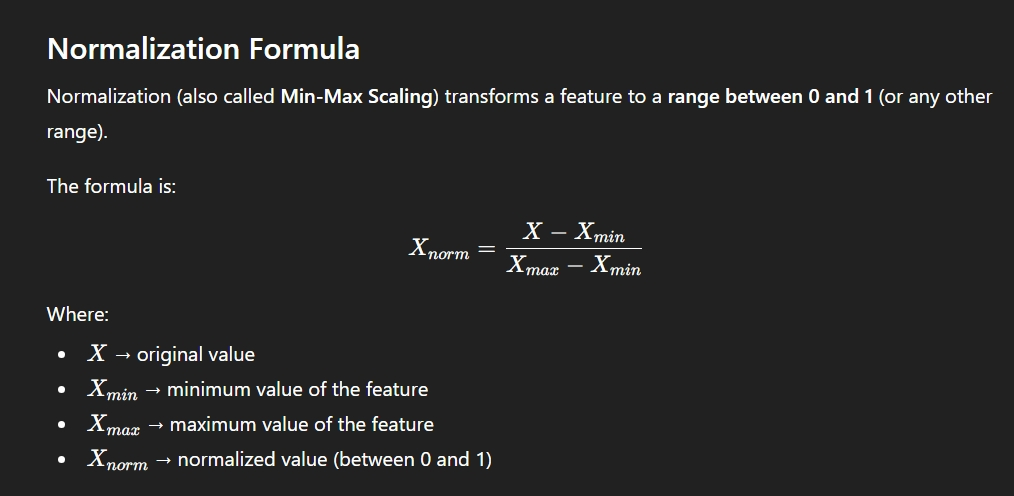

In [6]:
from IPython.display import Image, display

# Display a local image
display(Image(filename="images/norm1.jpeg"))


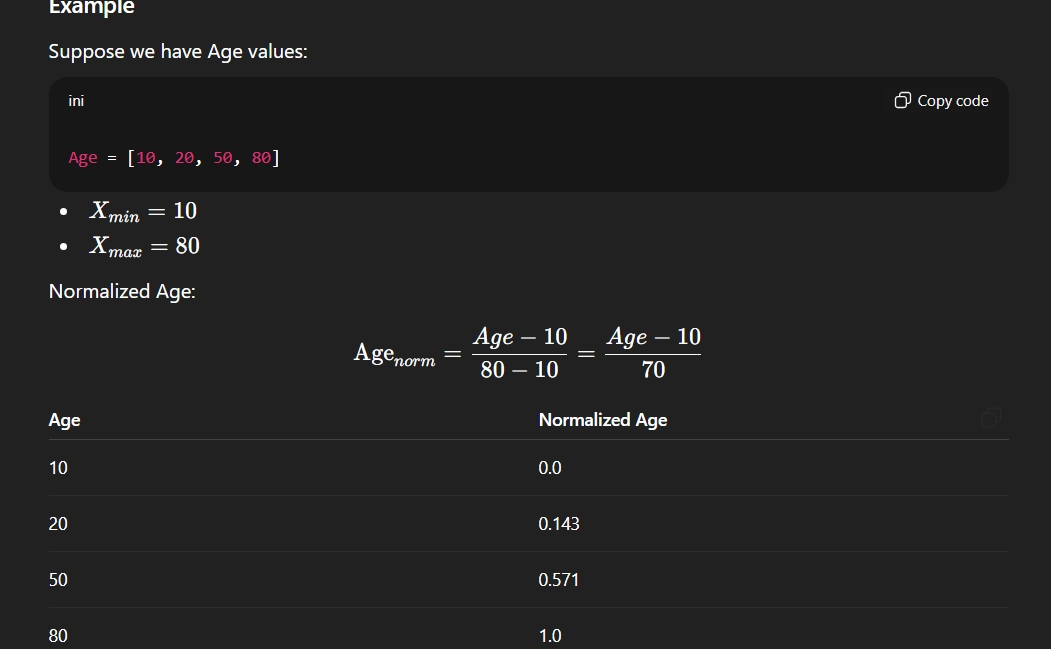

In [7]:
from IPython.display import Image, display

# Display a local image
display(Image(filename="images/norm2.jpeg"))


In [1]:
# Step 0: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load Titanic Dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Step 2: Check numerical columns
df[["Age", "Fare"]].describe()


,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


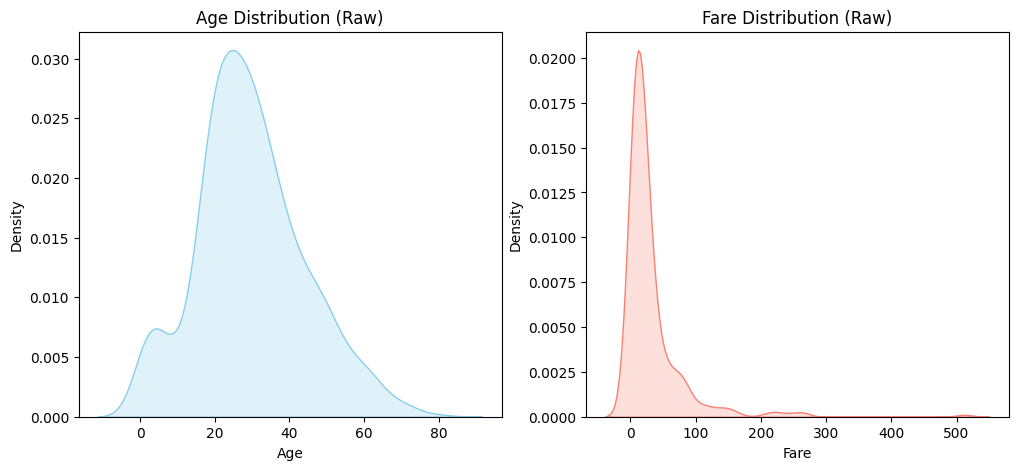

In [2]:
# Plot KDE for Age and Fare before normalization
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.kdeplot(df["Age"].dropna(), fill=True, color="skyblue")
plt.title("Age Distribution (Raw)")

plt.subplot(1,2,2)
sns.kdeplot(df["Fare"].dropna(), fill=True, color="salmon")
plt.title("Fare Distribution (Raw)")

plt.show()


In [3]:
# Select numerical columns
numerical_cols = ["Age", "Fare"]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


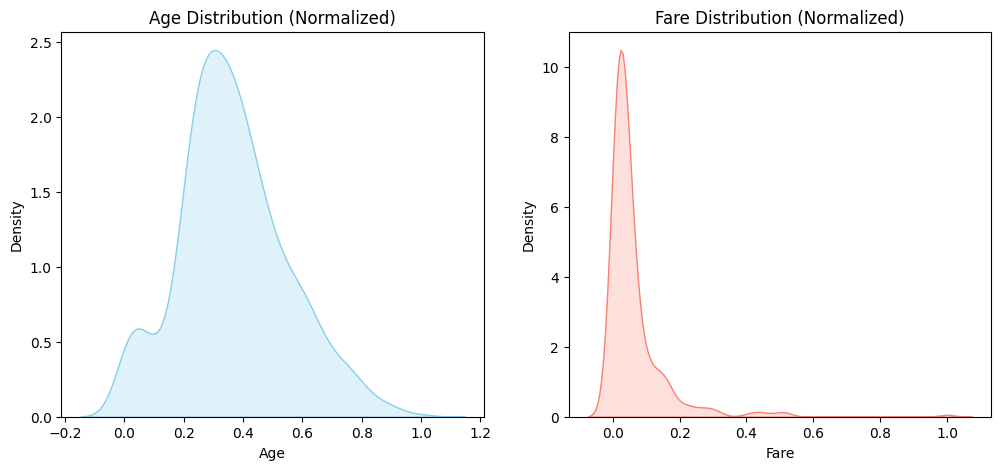

In [4]:
# Plot KDE for Age and Fare after normalization
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.kdeplot(df["Age"].dropna(), fill=True, color="skyblue")
plt.title("Age Distribution (Normalized)")

plt.subplot(1,2,2)
sns.kdeplot(df["Fare"].dropna(), fill=True, color="salmon")
plt.title("Fare Distribution (Normalized)")

plt.show()
